# U.S. Medical Insurance Costs

## Setting up necessary tools
I need to import the ```csv``` library to read the insurance data which is held in a csv file
It could also help to import a graphing library, ```matplotlib``` in order to look at our data

In [6]:
import csv
import matplotlib.pyplot as plt

## Goals
I'd like to analyze the insurance costs by region, and see if they correspond in any meaningful way with BMI

## Getting started
First I'll need all the information from the file in a nice, python-y format, the ```insurance_data```

In [7]:
insurance_data = []
with open('insurance.csv', newline='') as insurance_file:
    insurance_dict = csv.DictReader(insurance_file)
    for person in insurance_dict:
        insurance_data.append({key: value for key, value in person.items()})

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}, {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}, {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}, {'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}, {'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}, {'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges'

## Isolating important information
Time to get what's most useful from our ```insurance_data``` for this analysis: ```region```, ```bmi```, and ```price```

In [48]:
useful_data = []
for person in insurance_data:
    useful_data.append({"region": person['region'], "bmi": person['bmi'], "price": person['charges']})

prices_in_regions = {}
prices_in_bmi_zones = {"Underweight": [], "Healthy Weight": [], "Overweight": [], "Obese": []}
bmi_vs_price = {}
for person in useful_data:
    region = person["region"]
    bmi = float(person["bmi"])
    price = float(person["price"])

    bmi_vs_price[bmi] = price

    if bmi < 18.5:
        bmi_zone = "Underweight"
    elif bmi < 25:
        bmi_zone = "Healthy Weight"
    elif bmi < 30:
        bmi_zone = "Overweight"
    else:
        bmi_zone = "Obese"

    if region in prices_in_regions:
        prices_in_regions[region].append(price)
    else:
        prices_in_regions[region] = [price]

    prices_in_bmi_zones[bmi_zone].append(price)

## Averaging & visualizing the information
I need to go through my nice little dictionaries and set them equal to the averages instead of all the values, then I'll graph them all pretty

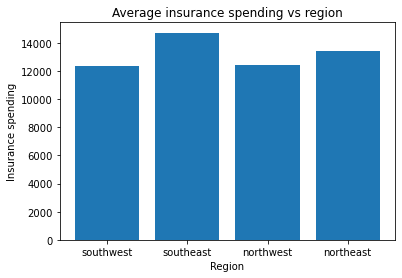

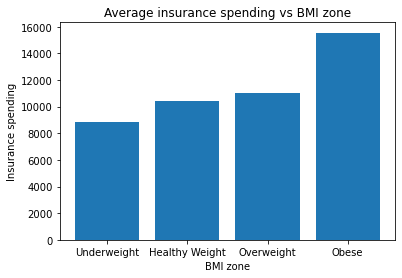

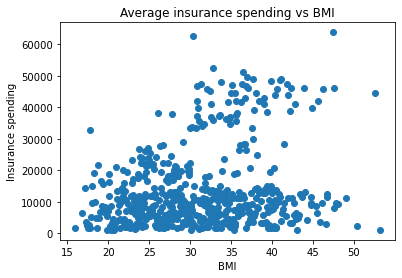

In [52]:
def average(prices):
    total = 0
    for price in prices:
        total += price
    return total / len(prices)

region_averages = {key: average(values) for key, values in prices_in_regions.items()}
bmi_zone_averages = {key: average(values) for key, values in prices_in_bmi_zones.items()}

plt.bar(region_averages.keys(), region_averages.values())
plt.title("Average insurance spending vs region")
plt.xlabel("Region")
plt.ylabel("Insurance spending")
plt.show()

plt.bar(bmi_zone_averages.keys(), bmi_zone_averages.values())
plt.title("Average insurance spending vs BMI zone")
plt.xlabel("BMI zone")
plt.ylabel("Insurance spending")
plt.show()

plt.scatter(bmi_vs_price.keys(), bmi_vs_price.values())
plt.title("Average insurance spending vs BMI")
plt.xlabel("BMI")
plt.ylabel("Insurance spending")
plt.show()

## Results
Based on our graphs:
- BMI seems to have a positive relationship with price
- Regions do not seem to have any effect